# Mini -projeto - CNN

## Introdução

Este diário é referente ao mini-projeto da disciplina de Redes Neurais onde uma RNC (Rede Neural Convolucional ou, do inglês *CNN* - *Convolutional Neural Network*) será usada para reconhecimento de dígitos manuscritos seguindo o roteiro proposto no capítulo 6 do livro [*Neural networks and deep learning*](http://neuralnetworksanddeeplearning.com/chap6.html) escrito por Michael Nielsen com algumas modificações que visam a objetividade do projeto e ainda devido à solicitação do prof da disciplina, será implementada uma técnica que o livro cita como *early stopping*, que consiste na parada automática do programa quando não há melhoramento significativo da acurácia do programa.

Para essa técnica usaremos o conjunto de validação para trabalhar.

**Equipe:**


**Pedro Beltran** (@pedrovbeltran) e
**Luana Silva** (@luana-leticia)

Após realizadas as modificações, começaremos de maneira análoga ao primeiro mini-projeto estabelecendo um valor pequeno para o parâmetro *no improvement in* do algoritmo *early stopping*, tal como 5 épocas.

In [1]:
import network3
from network3 import Network
from network3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer
training_data, validation_data, test_data = network3.load_data_shared()
mini_batch_size = 10
net = Network([
        FullyConnectedLayer(n_in=784, n_out=100),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
test_accuracy,_ = net.SGD(training_data, 5, mini_batch_size, 0.1, 
                        validation_data, test_data, monitor_test=True)

Finished training network after 24 epochs.
Best test accuracy of 97.66% obtained at iteration 114999
Best validation accuracy of 97.80% obtained at iteration 94999


Para facilitar o plot depois salvaremos o que fizemos de forma simples em um arquivo. Faremos isto apenas no primeiro e no último teste por questões de praticidade.

In [2]:
import json
f = open("saved_accuracy_test1.json", "w")
json.dump(test_accuracy, f)
f.close()

Para pegar uma base apenas fizemos um teste rápido com uma rede totalmente conectada com uma camada oculta de 100 neurônios para termos uma base do quanto o programa irá melhorar. Agora iremos inserir uma camada convolucional:

In [3]:
net = Network([
        ConvPoolLayer(input_shape=(mini_batch_size, 1, 28, 28), 
                      filter_shape=(20, 1, 5, 5), 
                      poolsize=(2, 2)),
        FullyConnectedLayer(n_in=20*12*12, n_out=100),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
net.SGD(training_data, 5, mini_batch_size, 0.1, validation_data, test_data)

Finished training network after 25 epochs.
Best test accuracy of 98.65% obtained at iteration 124999
Best validation accuracy of 98.59% obtained at iteration 99999


Testando agora com mais uma camada convolucional:

In [4]:
net = Network([
        ConvPoolLayer(input_shape=(mini_batch_size, 1, 28, 28), 
                      filter_shape=(20, 1, 5, 5), 
                      poolsize=(2, 2)),
        ConvPoolLayer(image_shape=(mini_batch_size, 20, 12, 12), 
                      filter_shape=(40, 20, 5, 5), 
                      poolsize=(2, 2)),
        FullyConnectedLayer(n_in=40*4*4, n_out=100),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
net.SGD(training_data, 5, mini_batch_size, 0.1, validation_data, test_data)

Finished training network after 34 epochs.
Best test accuracy of 99.05% obtained at iteration 154999
Best validation accuracy of 98.97% obtained at iteration 144999


Agora tentaremos obter uma melhora outra vez com $\eta = 0.03$, com regularização L2 ($\lambda = 0.1$) e mudando a função de ativação das unidades para a ReLU (do inglês *Rectified Linear Unit*).

In [5]:
from network3 import ReLU
net = Network([
        ConvPoolLayer(input_shape=(mini_batch_size, 1, 28, 28), 
                      filter_shape=(20, 1, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
        ConvPoolLayer(input_shape=(mini_batch_size, 20, 12, 12), 
                      filter_shape=(40, 20, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
        FullyConnectedLayer(n_in=40*4*4, n_out=100, activation_fn=ReLU),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
net.SGD(training_data, 5, mini_batch_size, 0.03, validation_data, test_data, lmbda=0.1)

Finished training network after 25 epochs.
Best test accuracy of 98.92% obtained at iteration 99999
Best validation accuracy of 99.01% obtained at iteration 99999


Obtivemos uma pequena melhora na acurácia no conjunto de validação mas não na do conjunto de teste, mas ainda assim demoramos menos épocas no treinamento e faremos outro teste, dessa vez usando um conjunto de treinamento expandido tal como o roteiro proposto:

In [6]:
expanded_training_data, _, _ = network3.load_data_shared(
        "/home/pedro/mnist_expanded.pkl.gz") # My particular path to the file
net = Network([
        ConvPoolLayer(input_shape=(mini_batch_size, 1, 28, 28), 
                      filter_shape=(20, 1, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
        ConvPoolLayer(input_shape=(mini_batch_size, 20, 12, 12), 
                      filter_shape=(40, 20, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
        FullyConnectedLayer(n_in=40*4*4, n_out=100, activation_fn=ReLU),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
net.SGD(expanded_training_data, 5, mini_batch_size, 0.03, validation_data, test_data, lmbda=0.1)

Finished training network after 18 epochs.
Best test accuracy of 99.25% obtained at iteration 324999
Best validation accuracy of 99.30% obtained at iteration 324999


Mais uma vez obtivemos melhores resultados, apesar de ter aumentado o tempo do processo de aprendizado devido ao conjunto de treinamento aumentado. Agora faremos o teste usando mais uma camada completamente conectada com 100 neurônios.

In [7]:
net = Network([
        ConvPoolLayer(input_shape=(mini_batch_size, 1, 28, 28), 
                      filter_shape=(20, 1, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
        ConvPoolLayer(input_shape=(mini_batch_size, 20, 12, 12), 
                      filter_shape=(40, 20, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
        FullyConnectedLayer(n_in=40*4*4, n_out=100, activation_fn=ReLU),
        FullyConnectedLayer(n_in=100, n_out=100, activation_fn=ReLU),
        SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
net.SGD(expanded_training_data, 5, mini_batch_size, 0.03, validation_data, test_data, lmbda=0.1)

Finished training network after 16 epochs.
Best test accuracy of 99.23% obtained at iteration 374999
Best validation accuracy of 99.32% obtained at iteration 274999


Agora, como último teste teremos o aumento das camadas intermediárias para 1000 neurônios e implementaremos a técnica *Dropout*.

In [8]:
net = Network([
        ConvPoolLayer(input_shape=(mini_batch_size, 1, 28, 28), 
                      filter_shape=(20, 1, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
        ConvPoolLayer(input_shape=(mini_batch_size, 20, 12, 12), 
                      filter_shape=(40, 20, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
        FullyConnectedLayer(
            n_in=40*4*4, n_out=1000, activation_fn=ReLU, p_dropout=0.5),
        FullyConnectedLayer(
            n_in=1000, n_out=1000, activation_fn=ReLU, p_dropout=0.5),
        SoftmaxLayer(n_in=1000, n_out=10, p_dropout=0.5)], 
        mini_batch_size)
test_accuracy, test_acc_by_class = net.SGD(expanded_training_data, 5, mini_batch_size, 0.03, 
                                            validation_data, test_data, monitor_test=True)

Finished training network after 17 epochs.
Best test accuracy of 99.57% obtained at iteration 349999
Best validation accuracy of 99.52% obtained at iteration 299999


Finalmente, salvaremos os resultados e plotaremos um gráfico comparando a acurácia geral entre o primeiro e último experimento, além de plotar um gráfico mostrando a acurácia por classe, de maneira análoga ao mini-projeto anterior, inclusive usando praticamente os mesmos códigos.

In [9]:
test_accuracy = list(test_accuracy)
test_acc_by_class = [list(a) for a in test_acc_by_class]

f = open("saved_accuracy_test2.json", "w")
json.dump(test_accuracy, f)
f.close()
# Saving the accuracies by class
f = open("saved_acc_by_class_test2.json", "w")
json.dump(test_acc_by_class, f)
f.close()

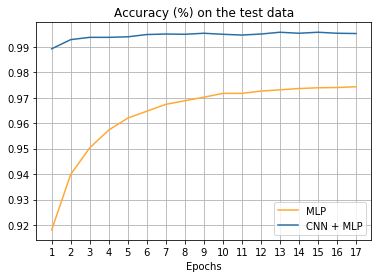

In [10]:
from matplotlib_for_total_acc import plot

f = open("saved_accuracy_test1.json", "r")
data_test1 = json.load(f)
f.close()

accuracy = []
# In this part we're slicing one of the lists so they can be on the same plot
if (len(data_test1) > len(test_accuracy)):
    accuracy = [data_test1[:len(test_accuracy)]]
    accuracy.append(test_accuracy)
    plot(len(accuracy), len(accuracy[0]), accuracy, [('MLP','#FFA933'), ('CNN + MLP','#2A6EA6')])
else:
    accuracy = [test_accuracy[:len(data_test1)]]
    accuracy.append(data_test1)
    plot(len(accuracy), len(accuracy[0]), accuracy, [('CNN + MLP','#2A6EA6'), ('MLP','#FFA933')])

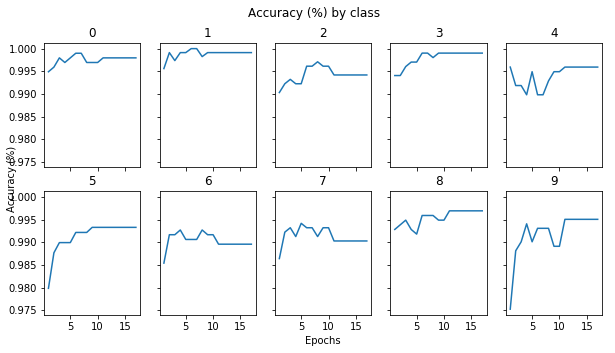

In [11]:
%matplotlib inline

from matplotlib_for_acc_by_class import plot
plot(10, len(test_accuracy), test_acc_by_class)

## Considerações Finais

Plotando a acuária por classe e analisando os gráficos, principalmente o da comparação entre a acurácia geral da rede convolucional final com a rede MLP inicial, percebemos claramente que há melhoramento significativo com a rede mista (CNN + MLP). A última rede foi executada de maneira muito lenta no computador disponível para testes devido à falta de GPU adequada para processamento compartilhado dos dados, então optou-se por mostrar apenas os resultados finais de cada rede.